In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore

In [15]:
pd.set_option("display.max_columns", None)

In [16]:
df = pd.read_csv("ESS10-subset-1.csv") # Add directory if needed
df.head()

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,prob,stratum,psu,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp,polintr,psppsgva,actrolga,psppipla,cptppola,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,trstsci,vote,contplt,donprty,badge,sgnptit,pbldmna,bctprd,pstplonl,volunfp,clsprty,prtdgcl,lrscale,stflife,stfeco,stfgov,stfdem,stfedu,stfhlth,gincdif,freehms,hmsfmlsh,hmsacld,euftf,lrnobed,loylead,imsmetn,imdfetn,impcntr,imbgeco,imueclt,imwbcnt,happy,sclmeet,inprdsc,sclact,crmvct,aesfdrk,health,hlthhmp,atchctr,atcherp,rlgblg,rlgdnm,rlgblge,rlgdnme,rlgdgr,rlgatnd,pray,dscrgrp,dscrrce,dscrntn,dscrrlg,dscrlng,dscretn,dscrage,dscrgnd,dscrsex,dscrdsb,dscroth,dscrdk,dscrref,dscrnap,dscrna,ctzcntr,brncntr,cntbrthd,livecnta,lnghom1,lnghom2,feethngr,facntr,fbrncntc,mocntr,mbrncntc,ccnthum,ccrdprs,wrclmch,vteurmmb,vteubcmb,implvdm,gndr,yrbrn,edlvebe,edlvebg,edlvdch,edlvehr,edlvdcz,edlvdee,edlvdfi,edlvdfr,edlvegr,edlvdahu,edlvdis,edlvdie,edlveit,edlvdlt,edlvdme,edlvenl,edlveno,edlvdpt,edlvesi,edlvdsk,educgb1,edubgb2,edagegb,acchome,accwrk,accmove,accoth,accnone,accref,accdk,accna,fampref,famadvs,fampdf,mcclose,mcinter,mccoord,mcpriv,mcmsinf,chldo12,gndro12a,gndro12b,ageo12,hhlio12,closeo12,ttmino12,speako12,scrno12,phoneo12,como12,c19spo12,c19mco12,livpnt,pntmofa,agepnt,hhlipnt,closepnt,ttminpnt,speakpnt,scrnpnt,phonepnt,compnt,c19sppnt,c19mcpnt,stfmjob,trdawrk,jbprtfp,pfmfdjba,dcsfwrka,wrkhome,c19whome,c19wplch,wrklong,wrkresp,c19whacc,mansupp,manhlp,manwrkpl,manspeak,manscrn,manphone,mancom,teamfeel,wrkextra,colprop,colhlp,colspeak,colscrn,colphone,colcom,c19spwrk,c19mcwrk,mcwrkhom,inwds,inwde,inwtm,mode
0,ESS10e03_2,10,3.2,02.11.2023,50002,GB,0.560761,0.462199,4.79422,2.215882,0.000202,1463,10279,60,2,6666,7,7,8,4,2,3,2,1,2,7,7,2,2,4,4,9,1,2,2,2,2,2,2,2,2,1,2,5,8,2,2,2,2,1,4,2,4,2,7,2,4,2,2,2,7,7,7,8,3,3,3,2,2,3,2,7,5,2,66,2,66,0,7,7,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,6666,6666,ENG,000,1,1,6666,1,6666,3,7,3,NaN,NaN,9,1,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,16,1,0,0,0,0,0,0,0,1,1,1,7,5,5,5,3,3,2,6,52,2,2,1,3,7,3,7,3,3,4,6,666,6,6,6666,66,66,66,66,66,6,66,6,66,6,6,66,66,6,66,66,66,66,6,66,66,66,66,66,66,66,66,6,66,66,66,66,66,66,66,2022-06-25 14:18:00,2022-06-25 14:58:00,26.0,1
1,ESS10e03_2,10,3.2,02.11.2023,50008,GB,1.121523,0.852171,4.79422,4.085496,0.000101,1428,10236,90,3,6666,8,8,7,2,3,1,3,1,6,6,5,7,7,5,5,8,1,2,2,2,2,2,2,2,2,1,2,9,8,6,7,8,6,6,4,2,4,3,5,2,4,3,3,3,3,3,3,9,4,4,3,2,2,1,3,10,3,2,66,1,2,4,5,7,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,6666,6666,ENG,000,1,1,6666,1,6666,3,10,5,NaN,NaN,10,2,1938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,20,1,0,0,0,0,0,0,0,1,1,1,3,3,0,5,0,2,1,6,54,2,2,1,3,7,3,6,1,1,4,6,666,6,6,6666,66,66,66,66,66,6,66,6,66,6,6,66,66,6,66,66,66,66,6,66,66,66,66,66,66,66,66,6,66,66,66,66,66,66,66,2021-09-13 15:03:00,2021-09-13 16:33:00,66.0,1
2,ESS10e03_2,10,3.2,02.11.2023,50021,GB,1.121523,0.828836,4.79422,3.973622,0.000101,1501,10327,60,1,6666,4,5,6,2,2,1,2,1,3,5,4,3,4,2,5,6,1,2,2,2,2,2,2,2,2,2,6,5,7,4,4,5,5,6,3,2,4,2,4,2,2,2,2,2,6,5,6,5,2,2,2,2,2,3,3,7,5,1,1,6,66,6,6,3,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,6666,6666,ENG,000,1,2,PL,1,6666,3,4,3,NaN,NaN,6,1,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,11,15,0,0,0,0,1,0,0,0,1,1,1,6,7,6,7,6,1,6,2,52,2,2,0,2,7,2,7,3,3,4,6,666,6,6,6666,66,66,66,66,66,6,66,6,66,6,6,66,66,6,66,66,66,66,6,66,66,66,66,66,66,66,66,6,66,66,66,66,66,66,66,2022-08-17 13:02:00,2022-08-17 14:33:00,69.0,1
3,ESS10e03_2,10,3.2,02.11.2023,50023,GB,1.121523,1.821306,4.79422,8.731745,0.000101,1478,10300,60,5,180,4,7,4,2,3,2,3,2,3,4,6,2,4,6,5,7,2,2,2,2,1,2,1,1,1,1,2,2,8,5,4,6,7,4,2,1,5,1,7,3,4,1,1,1,9,10,10,8,6,3,3,1,3,2,3,4,7,2,66,1,1,3,5,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,PL,2005,POL,000,1,2,PL,2,PL,3,8,4,NaN,NaN,10,2,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,11,96,1,0,0,0,0,0,0,0,5,5,4,4,8,8,7,9

In [17]:
# Hypothesis: Individuals who spend more time using the internet daily (netustm) are more likely to believe that online/mobile communication exposes people to misinformation (mcmsinf)."

In [18]:
replace_with_na = [0, 6666, 9999]
df['netustm'].replace(replace_with_na, np.nan, inplace=True)

C:\Users\19241\AppData\Local\Temp\ipykernel_10420\2117853589.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['netustm'].replace(replace_with_na, np.nan, inplace=True)


In [19]:
replace_with_na = [77, 88, 99]
df['mcmsinf'].replace(replace_with_na, np.nan, inplace=True)

C:\Users\19241\AppData\Local\Temp\ipykernel_10420\4167141451.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mcmsinf'].replace(replace_with_na, np.nan, inplace=True)


In [20]:
df_red = df[["netustm", "mcmsinf"]].dropna()

In [21]:
from scipy.stats import pearsonr
pearsonr(df_red['netustm'], df_red['mcmsinf'])

PearsonRResult(statistic=0.030144397535084876, pvalue=0.3574521513892938)

In [22]:
#This result shows that the statistic is negative which means it has a negative correlation betweeen these 2 variables. How ever since this data gives a p-value of 0.4549 this represent these 2 variables are not statisticly significant

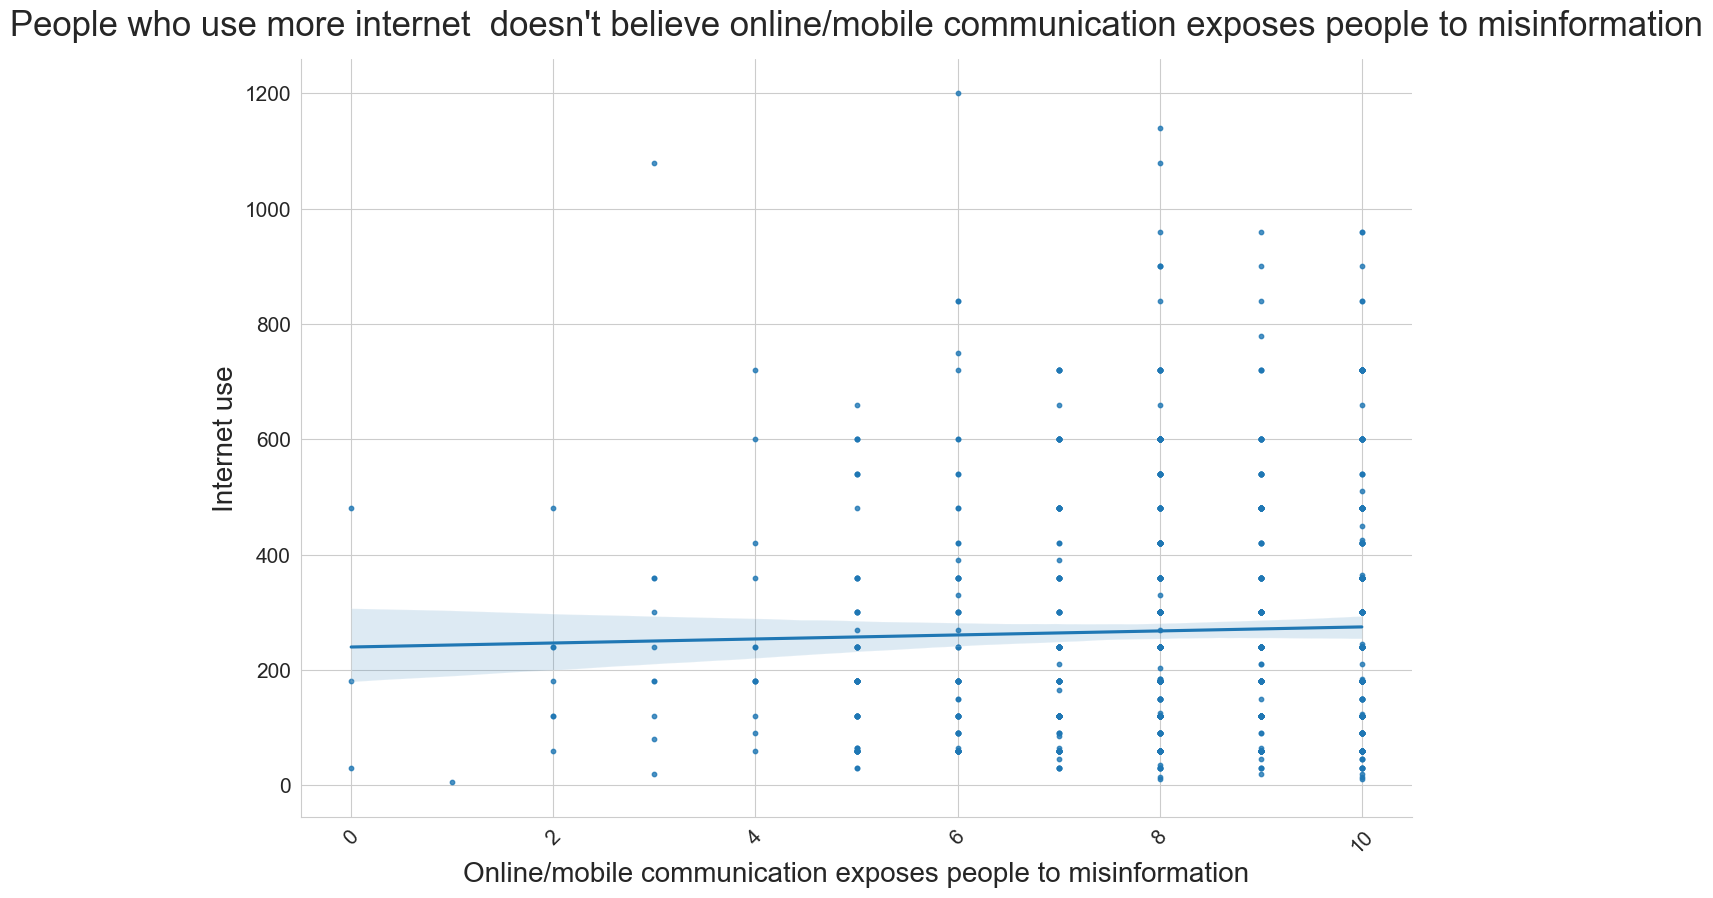

In [23]:
sns.set_style("whitegrid")
sns.lmplot(data=df_red, x="mcmsinf", y="netustm", 
           height=8.27, aspect=12/8.27, 
          scatter_kws={"s": 10})
plt.title ("People who use more internet  doesn't believe online/mobile communication exposes people to misinformation", fontsize=25, y=1.02)
plt.xlabel("Online/mobile communication exposes people to misinformation", fontsize=20) 
plt.ylabel("Internet use", fontsize=20)
plt.xticks(fontsize=15, rotation=45)  
plt.yticks(fontsize=15)
plt.show()

In [24]:
from scipy.stats import pearsonr
import numpy as np
def corrmat(name_df): 
    rho = name_df.corr()
    pval = name_df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
    p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
    return rho.round(2).astype(str) + p

In [25]:
correlation_matrix = df[["netustm", "mcmsinf", "ppltrst"]]

In [26]:
corrmat(correlation_matrix)

C:\Users\19241\AppData\Local\Temp\ipykernel_10420\3200642117.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))


,netustm,mcmsinf,ppltrst
netustm,1.0***,0.03,-0.02
mcmsinf,0.03,1.0***,-0.02
ppltrst,-0.02,-0.02,1.0***


In [28]:
# create a contingency table:
# by adding normalize="index" and multiplying by 100, the table contains percentages instead of absolute numbers.
contingency_table = pd.crosstab(df['netustm'], df['mcmsinf'], normalize='columns')*100 # Also try: normalize='index'
contingency_table.round()

mcmsinf,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
netustm,,,,,,,,,,,
5.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30.0,33.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,2.0,2.0,2.0
35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
60.0,0.0,0.0,14.0,0.0,8.0,17.0,20.0,12.0,11.0,12.0,13.0
64.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
